In [51]:
from abc import ABC, abstractmethod
from typing import Dict, List
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tqdm.auto import tqdm
import ast
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, MultiLabelBinarizer

In [52]:
data_folder = "./dataset_additional/"

users_df = pd.read_csv(data_folder + "users_df.csv")
items_df = pd.read_csv(data_folder + "items_df.csv")

countries = pd.read_csv(data_folder + "countries.csv")
genres = pd.read_csv(data_folder + "genres.csv")
staff = pd.read_csv(data_folder + "staff.csv")

data_folder = "./"

train_part = pd.read_csv(data_folder + "train_data.csv", parse_dates=["datetime"])
test_part = pd.read_csv(data_folder + "test_data.csv")
test_part = test_part.groupby("user_id").agg({"movie_id": list}).reset_index()

In [53]:
items_df['genres'] = [ast.literal_eval(genres) for genres in items_df['genres']]
items_df['countries'] = [ast.literal_eval(countries) for countries in items_df['countries']]
items_df['staff'] = [ast.literal_eval(staff) for staff in items_df['staff']]

items_df.rename(columns={'id' : 'movie_id'}, inplace=True)

Проверим, мог ли один пользователь смотреть фильм более одного раза.

In [54]:
duplicates = train_part.duplicated(subset=['user_id', 'movie_id'], keep=False)
print(train_part[duplicates])

Empty DataFrame
Columns: [id, datetime, user_id, movie_id, duration, is_train]
Index: []


Оценим, насколько test_part "важна".

In [55]:
mask = train_part['user_id'].isin(test_part['user_id'])
mask.sum() / len(train_part)

0.6935626753874801

Теперь оценим значимость признаков. Для этого построим графики распределения жанров для каждой категории каждого признака.

In [56]:
merged_df = pd.merge(train_part, users_df, on='user_id', how='left')
merged_df = pd.merge(merged_df, items_df, on='movie_id', how='left')

In [57]:
merged_df.head(2)

,id,datetime,user_id,movie_id,duration,is_train,age_category,income,sex,kids_flg,...,title,year,date_publication,description,genres,countries,staff,title_orig,age_rating,keywords
0,0,2023-04-06 15:00:00.071114+03:00,10250,427.0,485.0,True,35-44,NaN,NaN,0.0,...,Аннетт,2021-01-01,2022-12-26T00:00:00,Известным комику Генри МакГенри и оперной певи...,[97],"[175, 188, 49, 102, 0, 200, 166]","[24679, 10423, 28037, 11412, 23810, 3854, 2611...",NaN,NaN,NaN
1,1,2023-04-06 15:00:01.123928+03:00,2062,1521.0,129.0,True,18-24,NaN,Женский,0.0,...,Миньоны: Грювитация,2022-01-01,2023-03-30T00:00:00,"Великий и ужасный, но еще маленький Грю начина...","[46, 266, 304, 130]",[102],"[25296, 6034, 13340, 31102, 25501, 12149, 9210...",NaN,NaN,NaN


In [58]:
users_df.head(2)

,user_id,age_category,income,sex,kids_flg,education
0,10250,35-44,NaN,NaN,0.0,Высшее
1,2062,18-24,NaN,Женский,0.0,Среднее


In [59]:
mlb = MultiLabelBinarizer()
binarized_column = mlb.fit_transform(merged_df['genres'])
binarized_column_df = pd.DataFrame(binarized_column, columns=mlb.classes_)

merged_df = pd.concat([merged_df, pd.DataFrame(binarized_column_df)], axis=1)

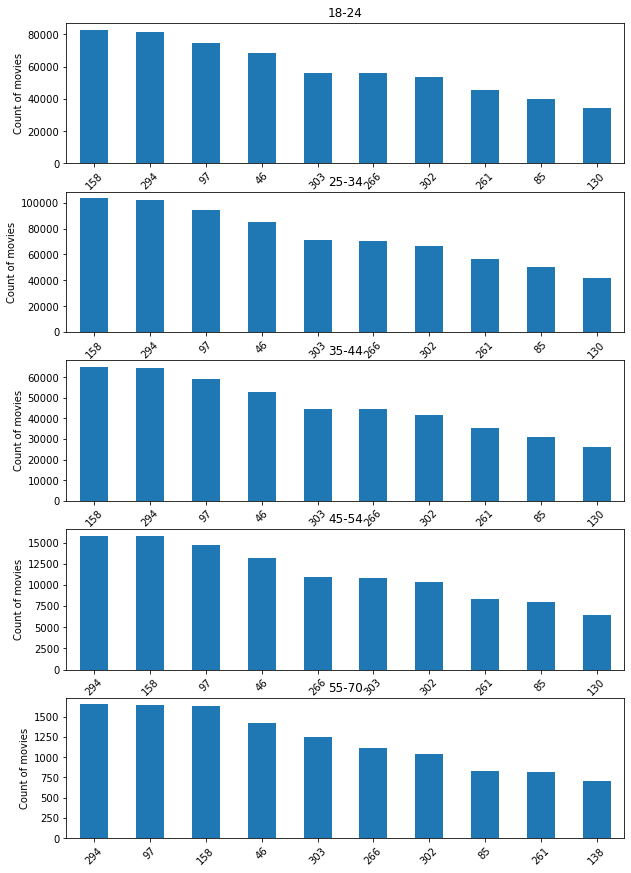

In [60]:
distribution = merged_df.groupby('age_category')[mlb.classes_].sum()

top_features = {}

for cat in distribution.index:
    top_10 = distribution.loc[cat].nlargest(10)
    top_features[cat] = top_10

fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 15))

for ax, (cat, series) in zip(axes, top_features.items()):
    series.plot(kind='bar', ax=ax)
    ax.set_title(f'{cat}')
    ax.set_ylabel('Count of movies')
    ax.set_xticklabels(series.index, rotation=45)

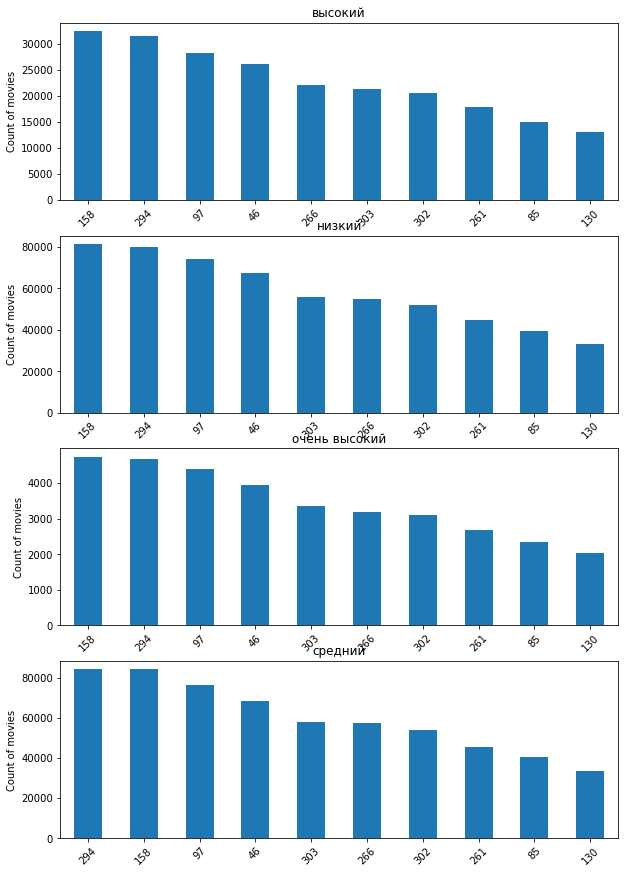

In [61]:
distribution = merged_df.groupby('income')[mlb.classes_].sum()

top_features = {}

for cat in distribution.index:
    top_10 = distribution.loc[cat].nlargest(10)
    top_features[cat] = top_10

fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 15))

for ax, (cat, series) in zip(axes, top_features.items()):
    series.plot(kind='bar', ax=ax)
    ax.set_title(f'{cat}')
    ax.set_ylabel('Count of movies')
    ax.set_xticklabels(series.index, rotation=45)

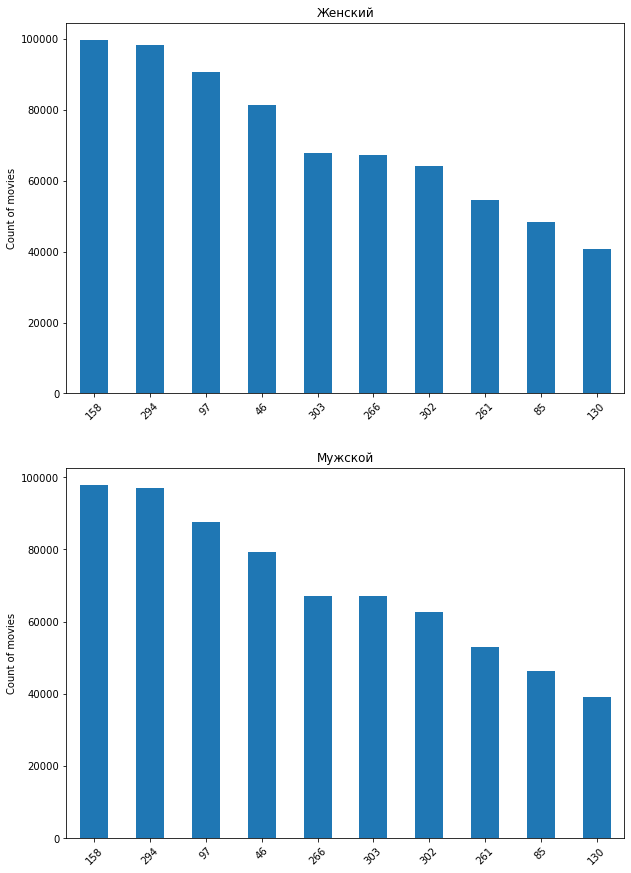

In [62]:
distribution = merged_df.groupby('sex')[mlb.classes_].sum()

top_features = {}

for cat in distribution.index:
    top_10 = distribution.loc[cat].nlargest(10)
    top_features[cat] = top_10

fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 15))

for ax, (cat, series) in zip(axes, top_features.items()):
    series.plot(kind='bar', ax=ax)
    ax.set_title(f'{cat}')
    ax.set_ylabel('Count of movies')
    ax.set_xticklabels(series.index, rotation=45)

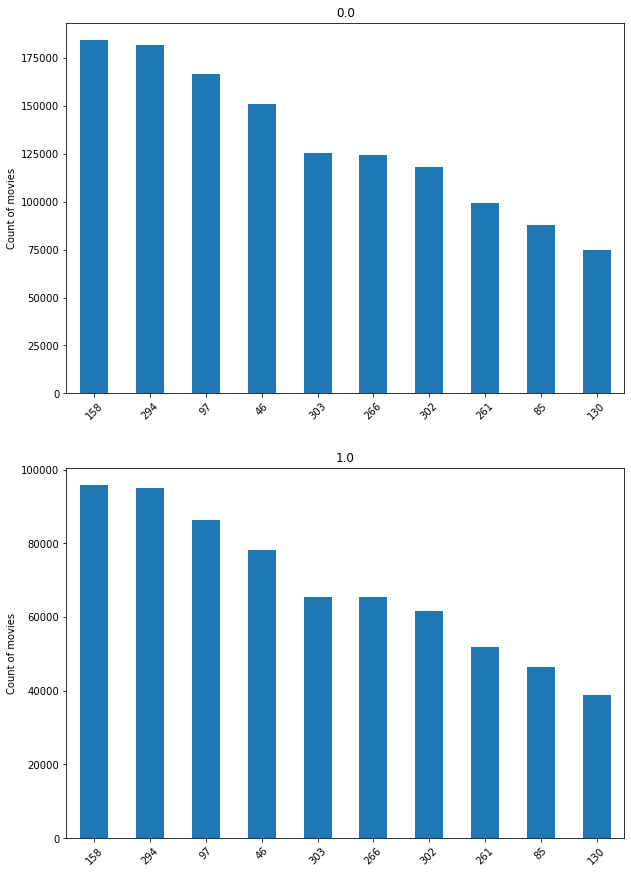

In [63]:
distribution = merged_df.groupby('kids_flg')[mlb.classes_].sum()

top_features = {}

for cat in distribution.index:
    top_10 = distribution.loc[cat].nlargest(10)
    top_features[cat] = top_10

fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 15))

for ax, (cat, series) in zip(axes, top_features.items()):
    series.plot(kind='bar', ax=ax)
    ax.set_title(f'{cat}')
    ax.set_ylabel('Count of movies')
    ax.set_xticklabels(series.index, rotation=45)

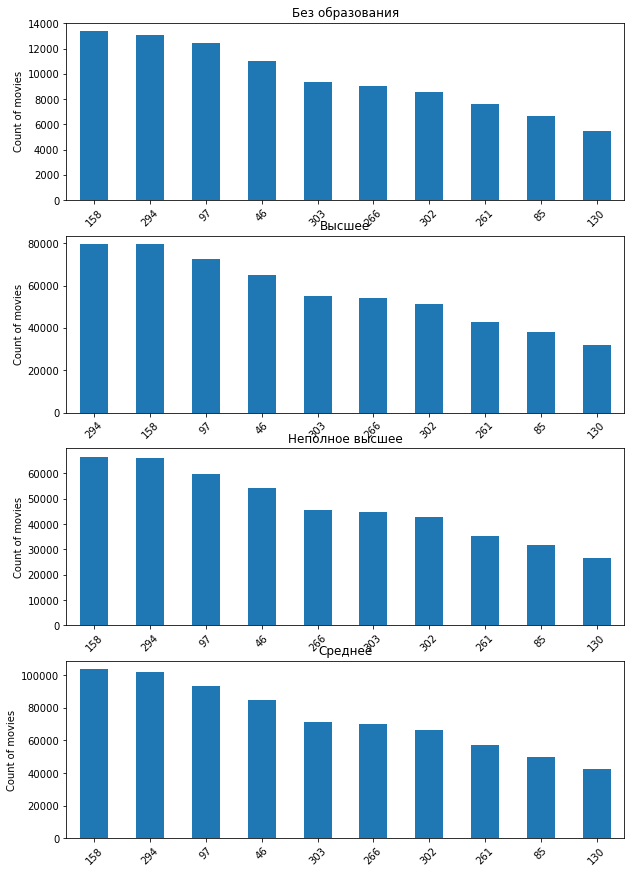

In [64]:
distribution = merged_df.groupby('education')[mlb.classes_].sum()

top_features = {}

for cat in distribution.index:
    top_10 = distribution.loc[cat].nlargest(10)
    top_features[cat] = top_10

fig, axes = plt.subplots(len(top_features), 1, figsize=(10, 15))

for ax, (cat, series) in zip(axes, top_features.items()):
    series.plot(kind='bar', ax=ax)
    ax.set_title(f'{cat}')
    ax.set_ylabel('Count of movies')
    ax.set_xticklabels(series.index, rotation=45)

С точки зрения жанров категории каждого из признаков практически не отличаются друг от друга. Попробуем оценить значимость признаков иначе. Для каждого признака и для каждого фильма из 100 самых популярных оценим величину
$$error_{movie} = \sqrt{\frac{\sum_{k=1}^{n} (p_k-q_k)^2}{n}}$$
где $n$ - общее количество категорий. $p_k$ - доля пользователей с данной категорией среди всех пользователей. $q_k$ - доля пользователей с данной категорией среди тех пользователей, который посмотрели фильм $movie$. 

In [65]:
ratings = train_part['movie_id'].value_counts().index.values[:100]

In [66]:
def error(category) -> float:
    counts = users_df[category].value_counts()
    counts = counts / counts.sum()

    error = 0
    for movie in ratings:
        counts_movie = merged_df[merged_df['movie_id'] == movie][category].value_counts()
        counts_movie = counts_movie / counts_movie.sum()

        rmse = np.sqrt(np.mean((counts - counts_movie) ** 2))

        error += rmse

    return error

In [67]:
for category in ['age_category', 'income', 'sex', 'kids_flg', 'education']:
    print(category, error(category))

age_category 0.7230882938875127
income 0.961565748867345
sex 1.0342126174789852
kids_flg 0.8348991888857393
education 0.8501059241591877


Как видим, для всех категорий значения примерно одинаковые. Посмотрим на распределение категорий для случайного фильма. 

In [68]:
movie = np.random.choice(ratings)

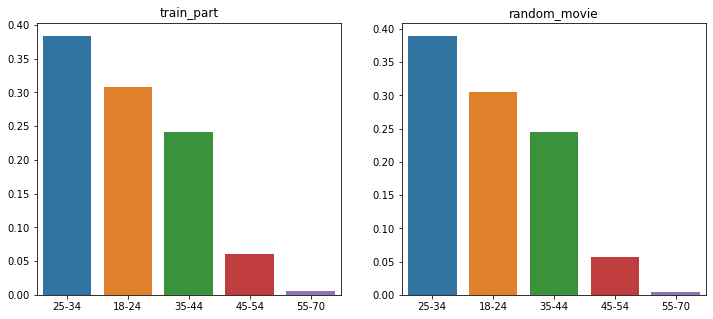

In [69]:
counts = users_df['age_category'].value_counts()
counts = counts / counts.sum()

counts_movie = merged_df[merged_df['movie_id'] == movie]['age_category'].value_counts()
counts_movie = counts_movie / counts_movie.sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=counts.index, y=counts.values, ax=axes[0])
axes[0].set_title('train_part')

sns.barplot(x=counts_movie.index, y=counts_movie.values, ax=axes[1])
axes[1].set_title('random_movie')


plt.show()

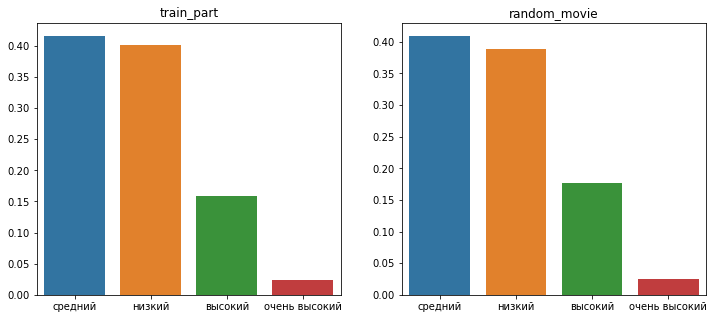

In [70]:
counts = users_df['income'].value_counts()
counts = counts / counts.sum()

counts_movie = merged_df[merged_df['movie_id'] == movie]['income'].value_counts()
counts_movie = counts_movie / counts_movie.sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=counts.index, y=counts.values, ax=axes[0])
axes[0].set_title('train_part')

sns.barplot(x=counts_movie.index, y=counts_movie.values, ax=axes[1])
axes[1].set_title('random_movie')


plt.show()

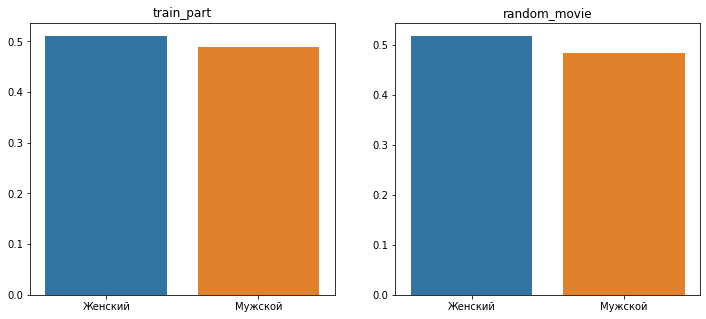

In [71]:
counts = users_df['sex'].value_counts()
counts = counts / counts.sum()

counts_movie = merged_df[merged_df['movie_id'] == movie]['sex'].value_counts()
counts_movie = counts_movie / counts_movie.sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=counts.index, y=counts.values, ax=axes[0])
axes[0].set_title('train_part')

sns.barplot(x=counts_movie.index, y=counts_movie.values, ax=axes[1])
axes[1].set_title('random_movie')


plt.show()

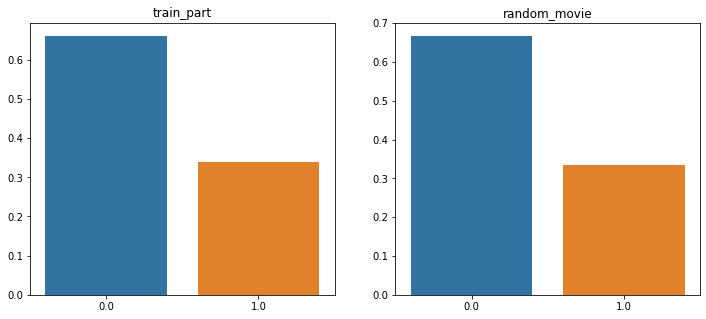

In [72]:
counts = users_df['kids_flg'].value_counts()
counts = counts / counts.sum()

counts_movie = merged_df[merged_df['movie_id'] == movie]['kids_flg'].value_counts()
counts_movie = counts_movie / counts_movie.sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=counts.index, y=counts.values, ax=axes[0])
axes[0].set_title('train_part')

sns.barplot(x=counts_movie.index, y=counts_movie.values, ax=axes[1])
axes[1].set_title('random_movie')


plt.show()

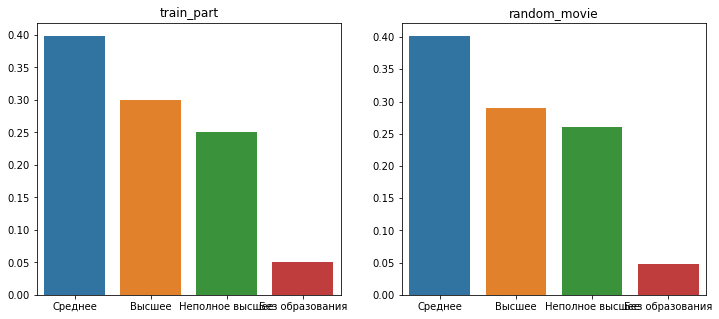

In [73]:
counts = users_df['education'].value_counts()
counts = counts / counts.sum()

counts_movie = merged_df[merged_df['movie_id'] == movie]['education'].value_counts()
counts_movie = counts_movie / counts_movie.sum()

fig, axes = plt.subplots(1, 2, figsize=(12, 5))

sns.barplot(x=counts.index, y=counts.values, ax=axes[0])
axes[0].set_title('train_part')

sns.barplot(x=counts_movie.index, y=counts_movie.values, ax=axes[1])
axes[1].set_title('random_movie')


plt.show()

Как видим, для каждого признака распределение категорий примерно совпадает с распределением категорий среди общего числа пользователей. С одной стороны, это говорит о том, что с точки зрения значимости все признаки примерно одинаковые, а с другой стороны - о том, что явной корреляции между признаками и целевыми переменными нет.